<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Data_Visualization_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset Visualization Notebook**

## Step 1: Setup and Data Loading

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

## 2. Data Overview

Inspect the first few rows and summary statistics to understand the dataset's structure:

In [3]:
# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


There are null values. The survival percentage was 38.38.

## 3. Handling Missing Values

Identify and handle missing data appropriately:

In [6]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Example: Fill missing 'Age' values with the median age

data['Age'].fillna(data['Age'].median(), inplace=True)


# fill missing 'Embarked' values
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# don't see any need to fill the cabin number, so ignored


<ipython-input-7-613421437b95>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-7-613421437b95>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [8]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## 4. Exploratory Data Analysis

Address the specific questions using visualizations:

**a. Distribution of Passenger Ages**

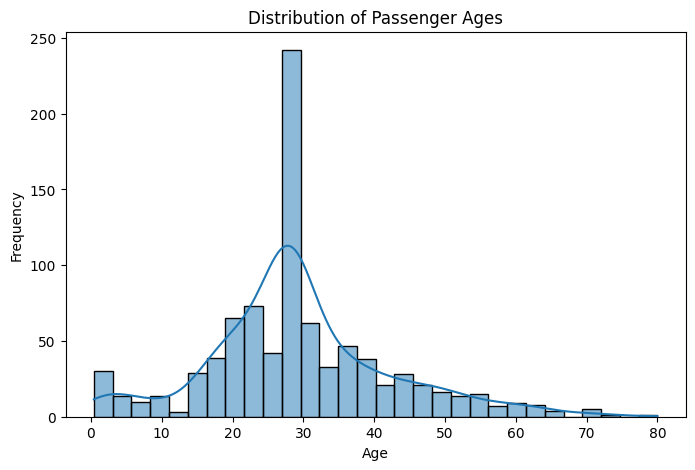

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**b. Survival Rate by Passenger Class (Pclass)**

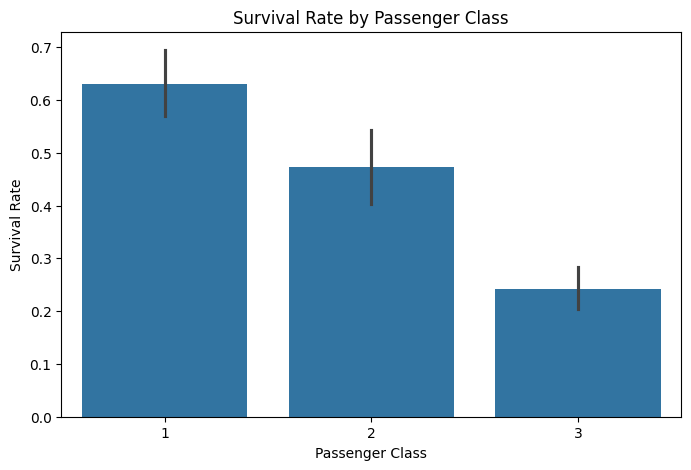

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


**c. Relationship Between Fare and Survival**

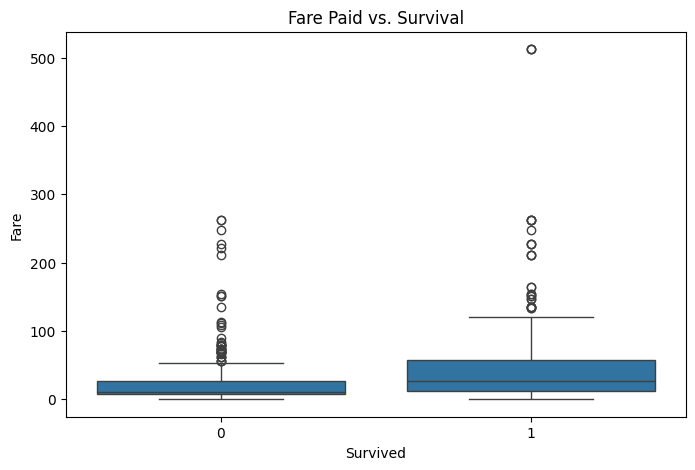

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Paid vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


**d. Survival Rate by Gender**

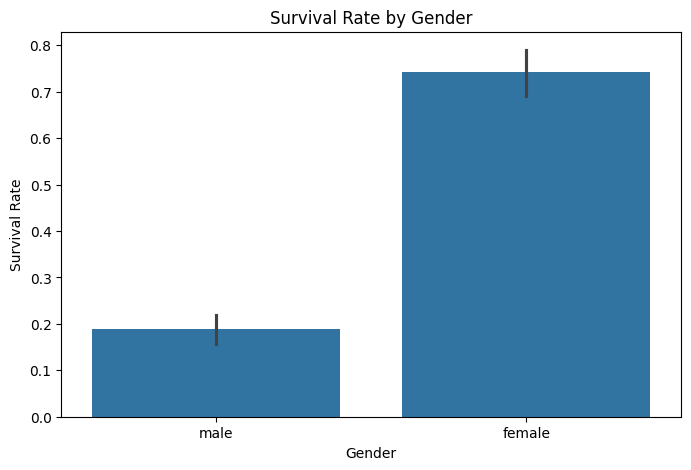

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


**e. Impact of SibSp and Parch on Survival**

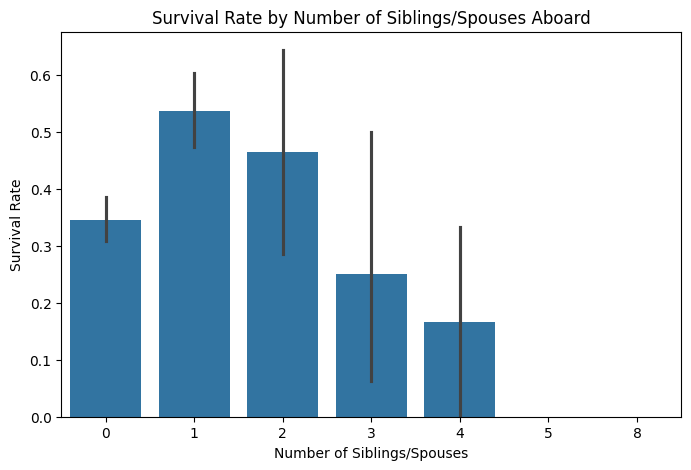

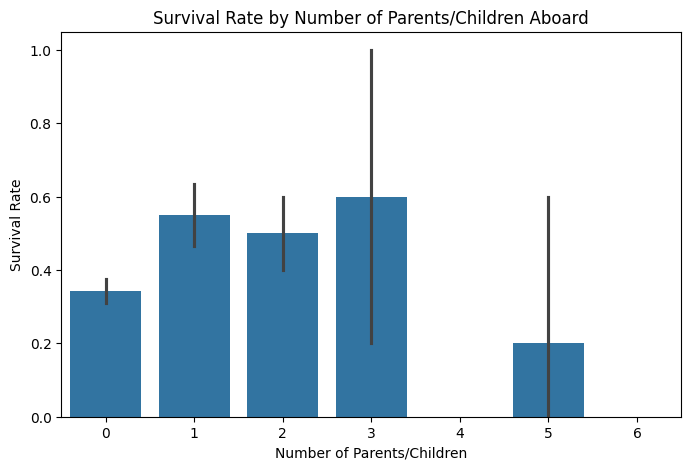

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()


**f. Survival Rates by Embarkation Port**

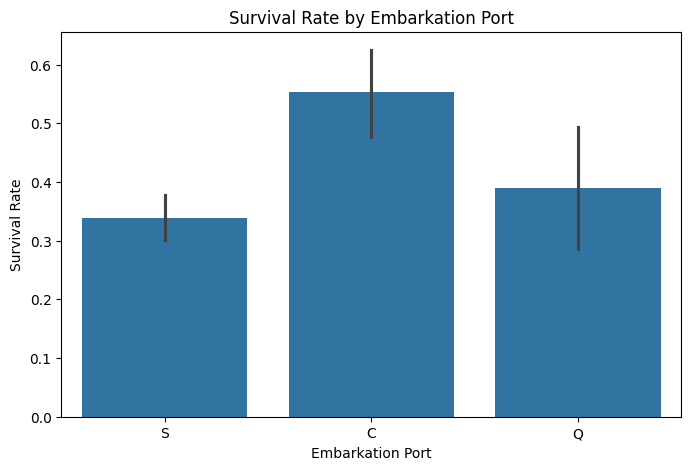

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


## 5. Data Interpretation

Analyze the visualizations to draw insights:

**a. Age Distribution:** The majority of passengers were between 20 and 40 years old.

**b. Survival by Class:** Passengers in first class had a higher survival rate compared to those in third class.

**c. Fare and Survival:** Survivors tended to have paid higher fares, indicating a correlation between fare and survival.

**d. Gender and Survival:** Females had a significantly higher survival rate than males.

**e. Family Size and Survival:** Passengers with 1-2 siblings/spouses or parents/children aboard had higher survival rates, while those alone or with larger families had lower survival rates.

**f. Embarkation Port and Survival:** Passengers who embarked from port 'C' (Cherbourg) had a higher survival rate compared to other ports.



## 6. Conclusion

The EDA reveals that survival on the Titanic was influenced by factors such as passenger class, gender, age, fare, family size, and embarkation port.